C:\Users\aleja\AppData\Local\Temp\ipykernel_26544\3057533788.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['trestbps'].fillna(df_2['trestbps'].median(), inplace=True)
C:\Users\aleja\AppData\Local\Temp\ipykernel_26544\3057533788.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

ElasticNet - Root Mean Squared Error: 81.07996257841175
ElasticNet - R^2 Score: 0.4441193560050566


c:\Users\aleja\Documents\College\2025\Machine Learning\BINF-5507\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.659e+06, tolerance: 8.745e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\aleja\Documents\College\2025\Machine Learning\BINF-5507\.pixi\envs\default\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\aleja\Documents\College\2025\Machine Learning\BINF-5507\.pixi\envs\default\Lib\site-packages\sklearn\li

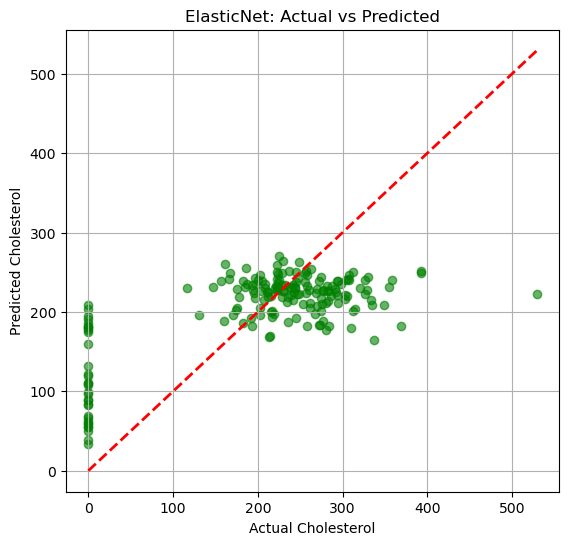

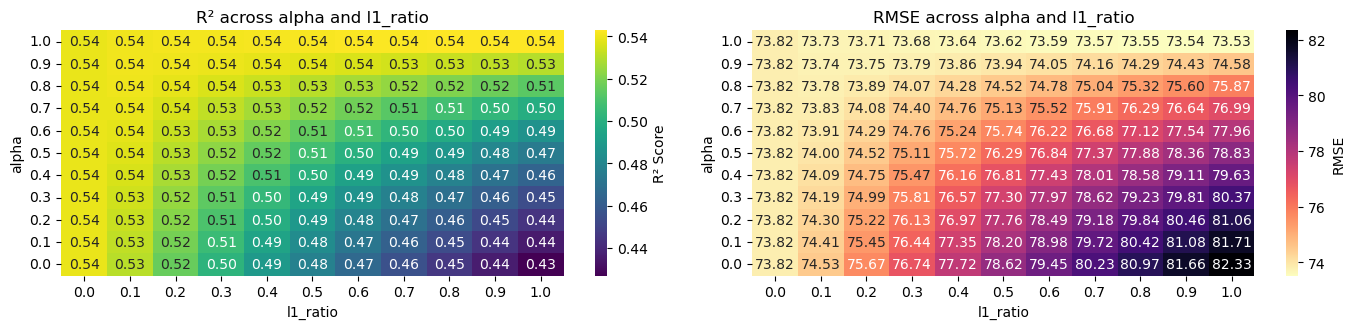

Logistic Regression - Accuracy: 0.8206521739130435
Logistic Regression - F1 Score: 0.8450704225352113
Logistic Regression - ROC AUC: 0.9016513761467889
Logistic Regression - Average Precision: 0.9214207057807071


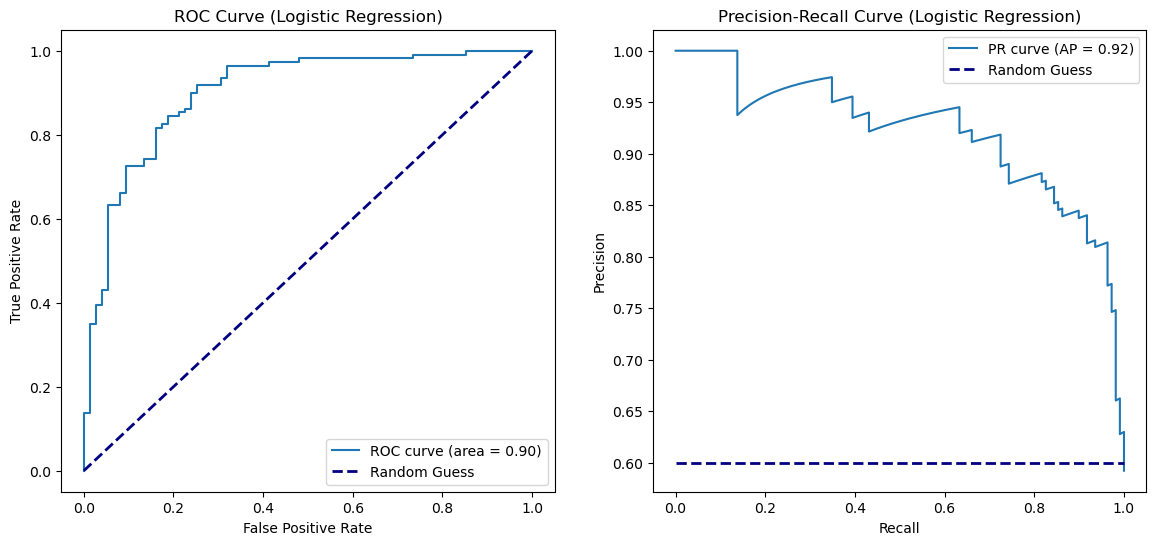

c:\Users\aleja\Documents\College\2025\Machine Learning\BINF-5507\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aleja\Documents\College\2025\Machine Learning\BINF-5507\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aleja\Documents\College\2025\Machine Learning\BINF-5507\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aleja\Documents\College\2025\Machine Learning\BINF-5507\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aleja\Documents\College\2025\Machine Learni

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.9031043655327444
k-NN Classifier - Accuracy: 0.717391304347826
k-NN Classifier - F1 Score: 0.7346938775510204
k-NN Classifier - ROC AUC: 0.7990214067278287
k-NN Classifier - Average Precision: 0.8214903481886545


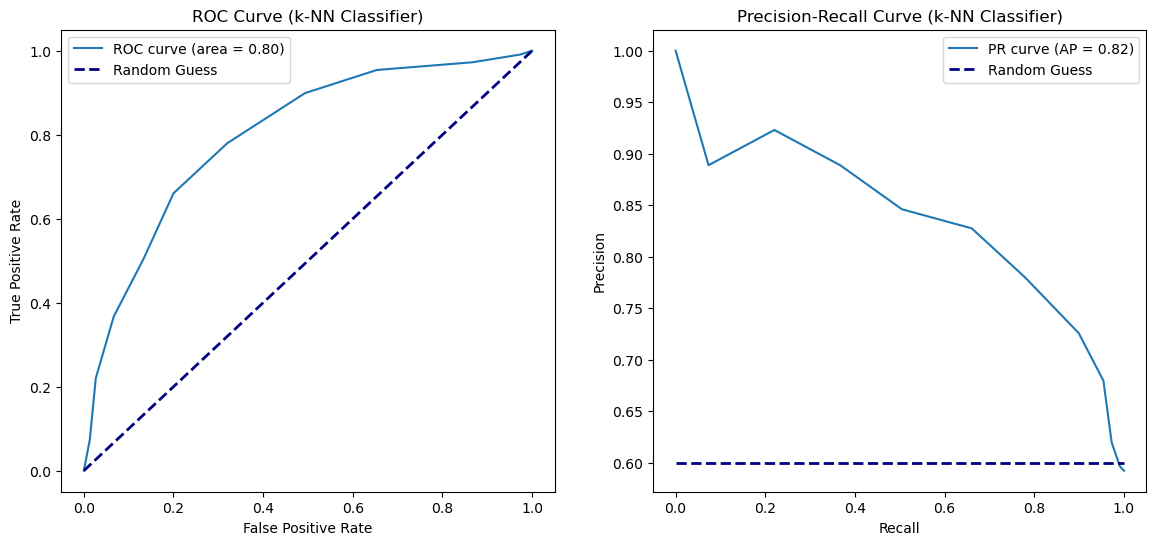

Best parameters for k-NN: {'n_neighbors': 10}
Best score for k-NN: 0.7367719992426744


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### Regression Models

# Import data
df = pd.read_csv('../Data/heart_disease_uci.csv')
df_2 = df.copy()

# Data pre-processing
df_2.drop(columns=['slope','ca','thal'], inplace=True)
df_2['trestbps'].fillna(df_2['trestbps'].median(), inplace=True)
df_2['chol'].fillna(df_2['chol'].median(), inplace=True)
df_2['fbs'].fillna("Unknown", inplace=True)
df_2['restecg'].fillna("Unknown", inplace=True)
df_2['thalch'].fillna(df_2['thalch'].mean(), inplace=True)
df_2['exang'].fillna("Unknown", inplace=True)
df_2['oldpeak'].fillna(df_2['oldpeak'].median(), inplace=True)

# Split data based on cholesterol leves (chol)
X = df_2.drop('chol', axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)
y = df_2['chol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardizing Features (I added this as I wasn't getting the expected R^2 and RMSE scores after
# running the script. AI helped me realize ElasticNet assumes the features are standardized)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an ElasticNet regularization model
# Can adjust alpha and l1_ratio values
alpha_0 = 0.9
l1_0 = 0.1
elastic_reg = ElasticNet(alpha = alpha_0, l1_ratio = l1_0, random_state = 42)
elastic_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_elastic = elastic_reg.predict(X_test)

# Evaluate the model
rmse_elastic = root_mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"ElasticNet - Root Mean Squared Error: {rmse_elastic}")
print(f"ElasticNet - R^2 Score: {r2_elastic}")

# ElasticNet
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_elastic, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Cholesterol')
plt.ylabel('Predicted Cholesterol')
plt.title('ElasticNet: Actual vs Predicted')
plt.grid(True)

# Heatmap

# Create range
alpha_range = np.round(np.arange(0.0, 1.1, 0.10), decimals=2)
l1_ratio_range = np.round(np.arange(0.0, 1.1, 0.10), decimals=2)

# Create empty dataframes
r2_df = pd.DataFrame(index=l1_ratio_range, columns=alpha_range, dtype=float)
rmse_df = pd.DataFrame(index=l1_ratio_range, columns=alpha_range, dtype=float)

for l1_1 in l1_ratio_range:
    for alpha_1 in alpha_range:

        # Train an ElasticNet regularization model
        elastic_reg_range = ElasticNet(alpha = alpha_1, l1_ratio = l1_1, random_state = 42)
        elastic_reg_range.fit(X_train, y_train)

        # Predict on the test set
        y_pred_elastic_range = elastic_reg_range.predict(X_test)

        # Evaluate the model
        rmse_range = root_mean_squared_error(y_test, y_pred_elastic_range)
        r2_range = r2_score(y_test, y_pred_elastic_range)

        # Store values in r2 and rmse dataframes
        rmse_df.loc[l1_1, alpha_1] = rmse_range
        r2_df.loc[l1_1, alpha_1] = r2_range

# Create plot

# R² Heatmap
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
sns.heatmap(r2_df, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'R² Score'})
plt.gca().invert_yaxis()
plt.title("R² across alpha and l1_ratio")
plt.xlabel("l1_ratio")
plt.ylabel("alpha")

# RMSE Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(rmse_df, annot=True, fmt=".2f", cmap="magma_r", cbar_kws={'label': 'RMSE'})
plt.gca().invert_yaxis()
plt.title("RMSE across alpha and l1_ratio")
plt.xlabel("l1_ratio")
plt.ylabel("alpha")

plt.tight_layout()
plt.show()


### Classification models

df_3 = df_2.copy()

# Generate synthetic data
X = df_3.drop('num', axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)
y = (df_3['num'] > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a logistic regression model
# Can adjust penalty, solver and C values
penalty = 'l1'
solver = 'liblinear'
C = 1
log_reg = LogisticRegression(penalty=penalty, solver=solver, C=C)
log_reg.fit(X_train, y_train)

# Predict probabilities
y_scores = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression - Accuracy: {accuracy}")
print(f"Logistic Regression - F1 Score: {f1}")
print(f"Logistic Regression - ROC AUC: {roc_auc}")
print(f"Logistic Regression - Average Precision: {average_precision}")

# Plot the results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision:.2f})')
plt.plot([0,1],[0.6,0.6], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.legend()
plt.show()

# Hyperparameter tuning (logistic regression)

# Define parameter grids
param_grid_log = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'C': [0.1, 1, 10]
}
grid_search_log = GridSearchCV(LogisticRegression(), param_grid_log, cv=5, scoring='average_precision')
grid_search_log.fit(X_train, y_train)

# Print best parameters and scores
print(f"Best parameters for Logistic Regression: {grid_search_log.best_params_}")
print(f"Best score for Logistic Regression: {grid_search_log.best_score_}")

# Train a k-NN classifier
# Can adjust n_neighbors value
n_neighbors = 10
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

# Predict probabilities
y_scores_knn = knn.predict_proba(X_test)[:, 1]
y_pred_knn = knn.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores_knn)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, y_scores_knn)
average_precision = average_precision_score(y_test, y_scores_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f"k-NN Classifier - Accuracy: {accuracy}")
print(f"k-NN Classifier - F1 Score: {f1}")
print(f"k-NN Classifier - ROC AUC: {roc_auc}")
print(f"k-NN Classifier - Average Precision: {average_precision}")

# Plot the results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (k-NN Classifier)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision:.2f})')
plt.plot([0,1],[0.6,0.6], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (k-NN Classifier)')
plt.legend()
plt.show()

# Hyperparameter tuning (k-NN)

# Define parameter grids
param_grid_knn = {'n_neighbors': [1, 5, 10]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='average_precision')
grid_search_knn.fit(X_train, y_train)

# Print best parameters and scores
print(f"Best parameters for k-NN: {grid_search_knn.best_params_}")
print(f"Best score for k-NN: {grid_search_knn.best_score_}")
